In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.getcwd())

/Users/jiang/github_all/rainymotion


In [2]:
import os
import numpy as np
import numpy.ma as ma
import pandas as pd
import glob
from datetime import datetime,timedelta
from time import time
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap

In [3]:
threat_file = "all_threat.csv"
data = pd.read_csv(threat_file)

In [4]:
data.tail()

,datetime,rain_coverage,rainy_threat,kakuho_threat
375,202004100555,0.010,0.154,0.103
376,202004100610,0.009,0.150,0.091
377,202004100630,0.008,0.155,0.093
378,202004100650,0.008,0.139,0.091
379,202004100705,0.008,0.148,0.091


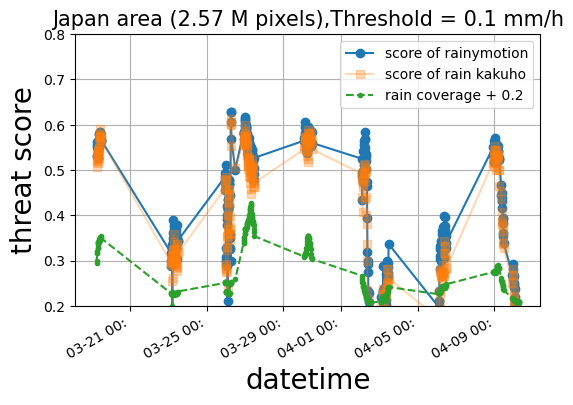

In [7]:
plt.figure(dpi=100)
dates = data.datetime.apply(lambda x:datetime.strptime(str(x),"%Y%m%d%H%M"))

plt.plot(dates, data.rainy_threat, 'o-', label = "score of rainymotion")
plt.plot(dates, data.kakuho_threat, 's-',alpha = 0.3,label = "score of rain kakuho")
plt.plot(dates, data.rain_coverage + 0.2, '.--',label = "rain coverage + 0.2")
plt.title("Japan area (2.57 M pixels),Threshold = 0.1 mm/h",fontsize= 15)
plt.legend()
plt.xlabel("datetime",fontsize= 20)
plt.ylabel("threat score",fontsize= 20)
plt.ylim([0.2,0.8])
plt.grid()

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d %H:')) # 格式化时间轴标注
plt.gcf().autofmt_xdate() # 优化标注（自动倾斜）
plt.savefig("1hour_threat_compare.png",format = "png",bbox_inches='tight')

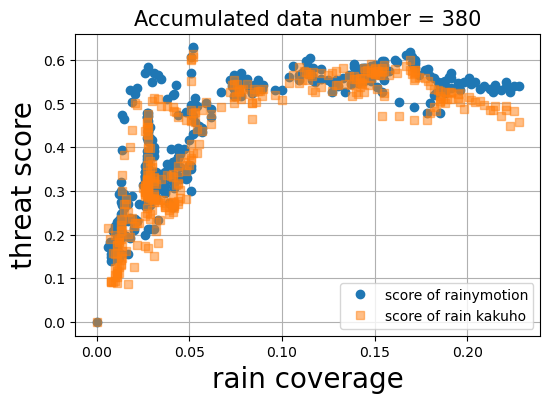

In [18]:
plt.figure(dpi=100)
plt.plot(data.rain_coverage, data.rainy_threat, 'o', label = "score of rainymotion")
plt.plot(data.rain_coverage, data.kakuho_threat, 's',alpha = 0.5, label = "score of rain kakuho")
plt.title(f"Accumulated data number = {data.shape[0]}",fontsize= 15)
plt.legend()
plt.xlabel("rain coverage",fontsize= 20)
plt.ylabel("threat score",fontsize= 20)
#plt.ylim([0.2,0.8])
plt.grid()
plt.savefig("threat_rain.png",format = "png",bbox_inches='tight')